# Introduction to TDA methodologies

*Disclaimer*: some images shown here are taken part from the *TOPdata* lecture slides, part from some tutorials I found while studying the topic. 
For these images I do not take credit and I will make sure to put a reference whenever needed.

In [1]:
import numpy as np
import sys

import gudhi as gd
import gudhi.representations

import networkx as nx
import itertools

import pandas as pd

sys.path.append('../')
from tools import plot_tools as myplt
from tools import topo_tools as mytop

import matplotlib.pyplot as plt

Topological Data Analysis generally aims at extracting topological features from a Point Cloud Data (PCD) set.
This is based on the assumption that a point cloud in $\mathbb R^d$ or in a general metric space could be endowed with a *shape*, which consequently can be described using topological features.

## Simple examples of Point Cloud Data (PCD)

In [2]:
path_file = '../datasets/samplePCD/'

files_list = [
    'data_00.txt', 
    'data_01.txt', 
    'data_02.txt', 
    'data_03.txt', 
    'data_04.txt'
]

dataSet = {
    'data_'+str(i): np.loadtxt(path_file+file, skiprows=1) for i,file in enumerate(files_list)
}

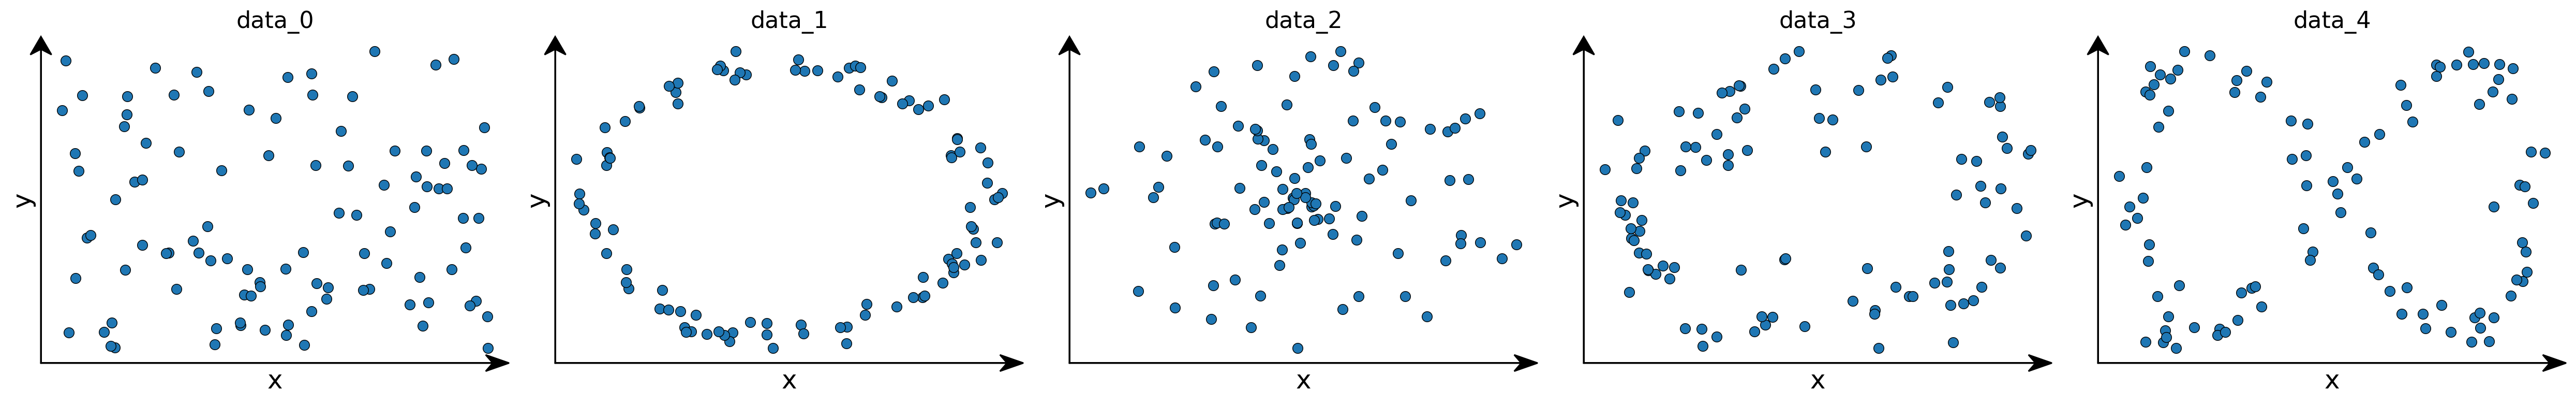

In [3]:
fig, ax = myplt.get_axes(len(files_list), max_col=5, res=200)
for i,j in enumerate(dataSet):
    myplt.single_scatter_axe(dataSet[j], ax[i], s=50)
    myplt.axarrows(fig,ax[i],labels=['x','y'])
    ax[i].set_title(r''+j, size=16)
fig.tight_layout()

In [4]:
MEL = 1.0
skeletons = {
    'sk_'+str(i): mytop.get_skeleton(dataSet[dset],MEL) for i,dset in enumerate(dataSet)
}

In [5]:
MAX_DIM = 2
VRcomplexes = {
    'VR_'+str(i): mytop.get_VRcomplex(skeletons[sk],MAX_DIM) for i,sk in enumerate(skeletons)
}

In [6]:
barCodes = {
    'brcd_'+str(i): mytop.get_barCode(VRcomplexes[vr]) for i,vr in enumerate(VRcomplexes)
}

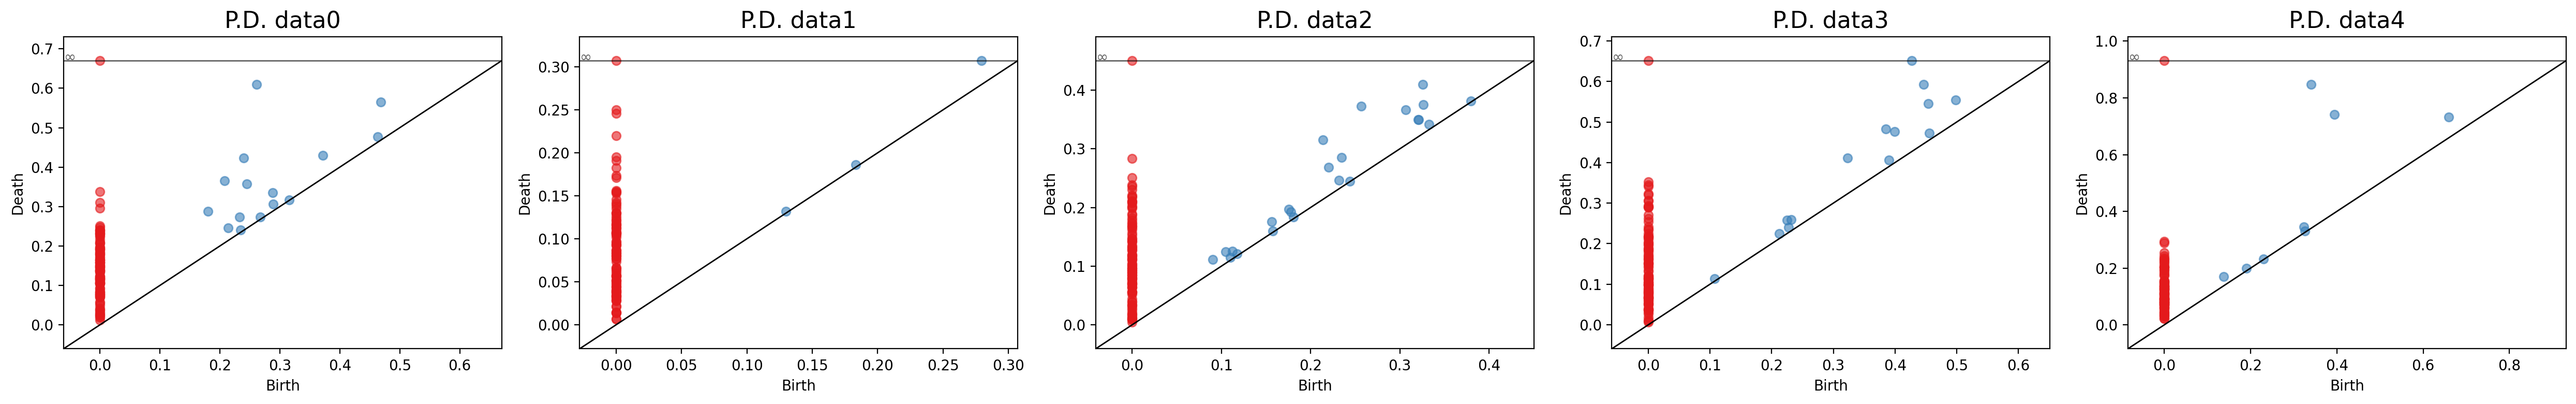

In [7]:
fig, ax = myplt.get_axes(len(files_list), max_col=5, res=200)
for i,j in enumerate(barCodes):
    gd.plot_persistence_diagram(barCodes[j], axes=ax[i])
    ax[i].set_title(r'P.D. data'+str(i), size=16)
#     ax[i].set_xlabel(r'Birth', size=16)
#     ax[i].set_ylabel(r'Death', size=16)
fig.tight_layout()

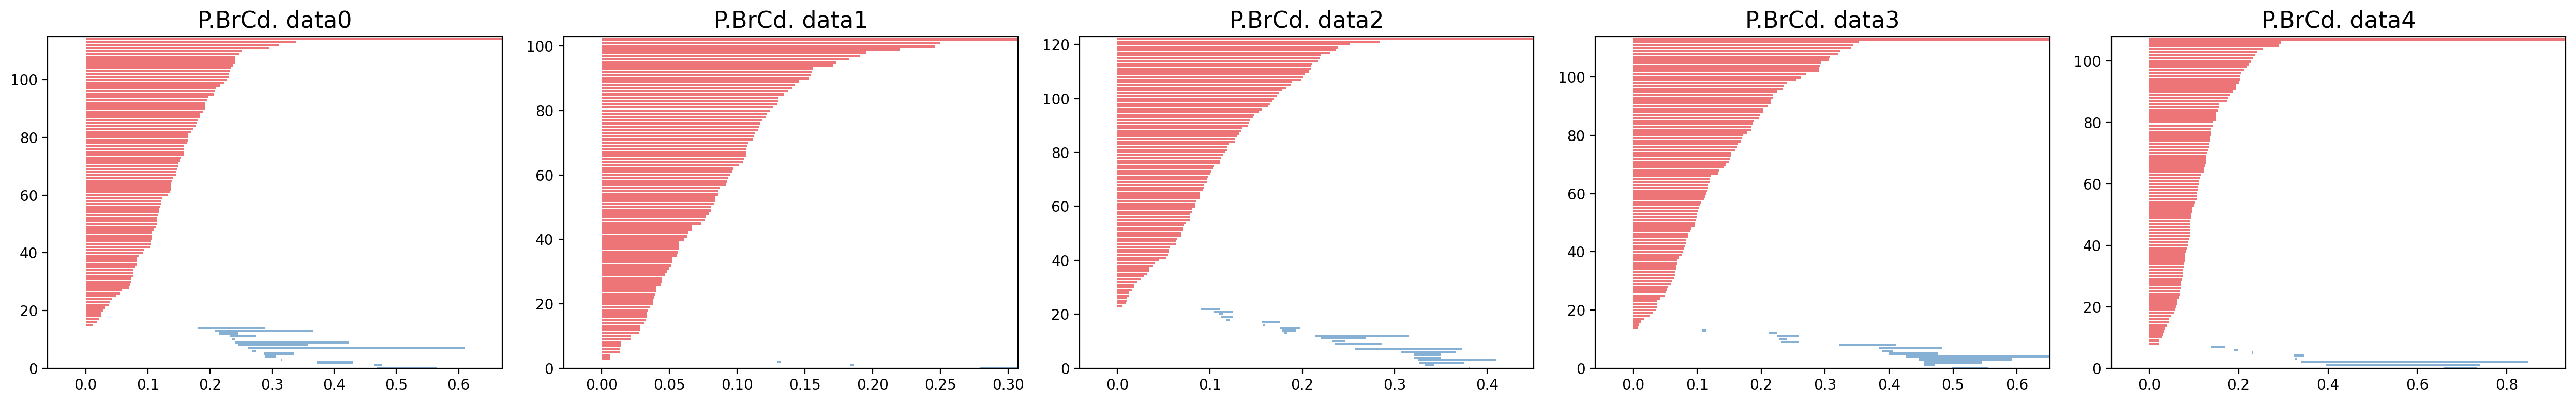

In [8]:
fig, ax = myplt.get_axes(len(files_list), max_col=5, res=200)
for i,j in enumerate(barCodes):
    gd.plot_persistence_barcode(barCodes[j], axes=ax[i])
    ax[i].set_title(r'P.BrCd. data'+str(i), size=16)
#     ax[i].set_xlabel(r'Birth', size=16)
#     ax[i].set_ylabel(r'Death', size=16)
fig.tight_layout()

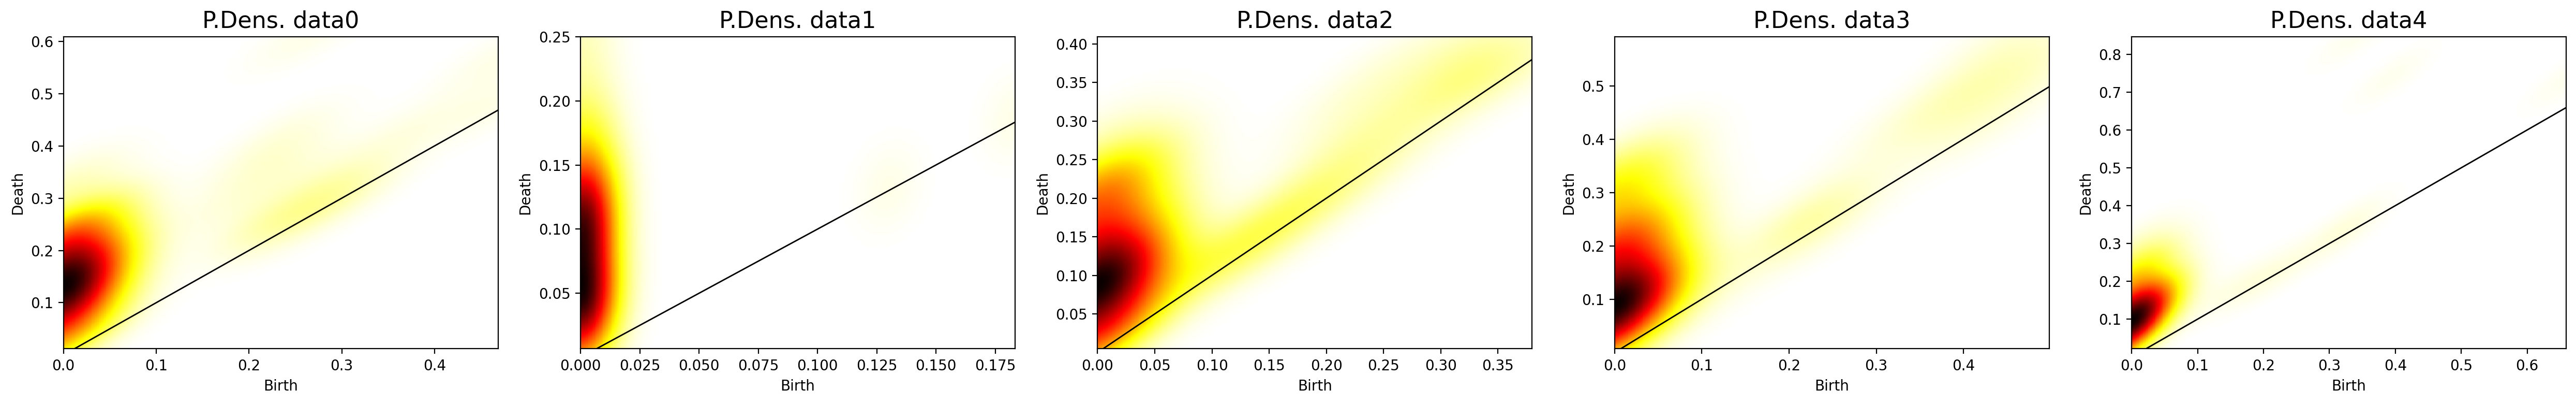

In [9]:
fig, ax = myplt.get_axes(len(files_list), max_col=5, res=200)
for i,j in enumerate(barCodes):
    gd.plot_persistence_density(barCodes[j], axes=ax[i])
    ax[i].set_title(r'P.Dens. data'+str(i), size=16)
#     ax[i].set_xlabel(r'Birth', size=16)
#     ax[i].set_ylabel(r'Death', size=16)
fig.tight_layout()

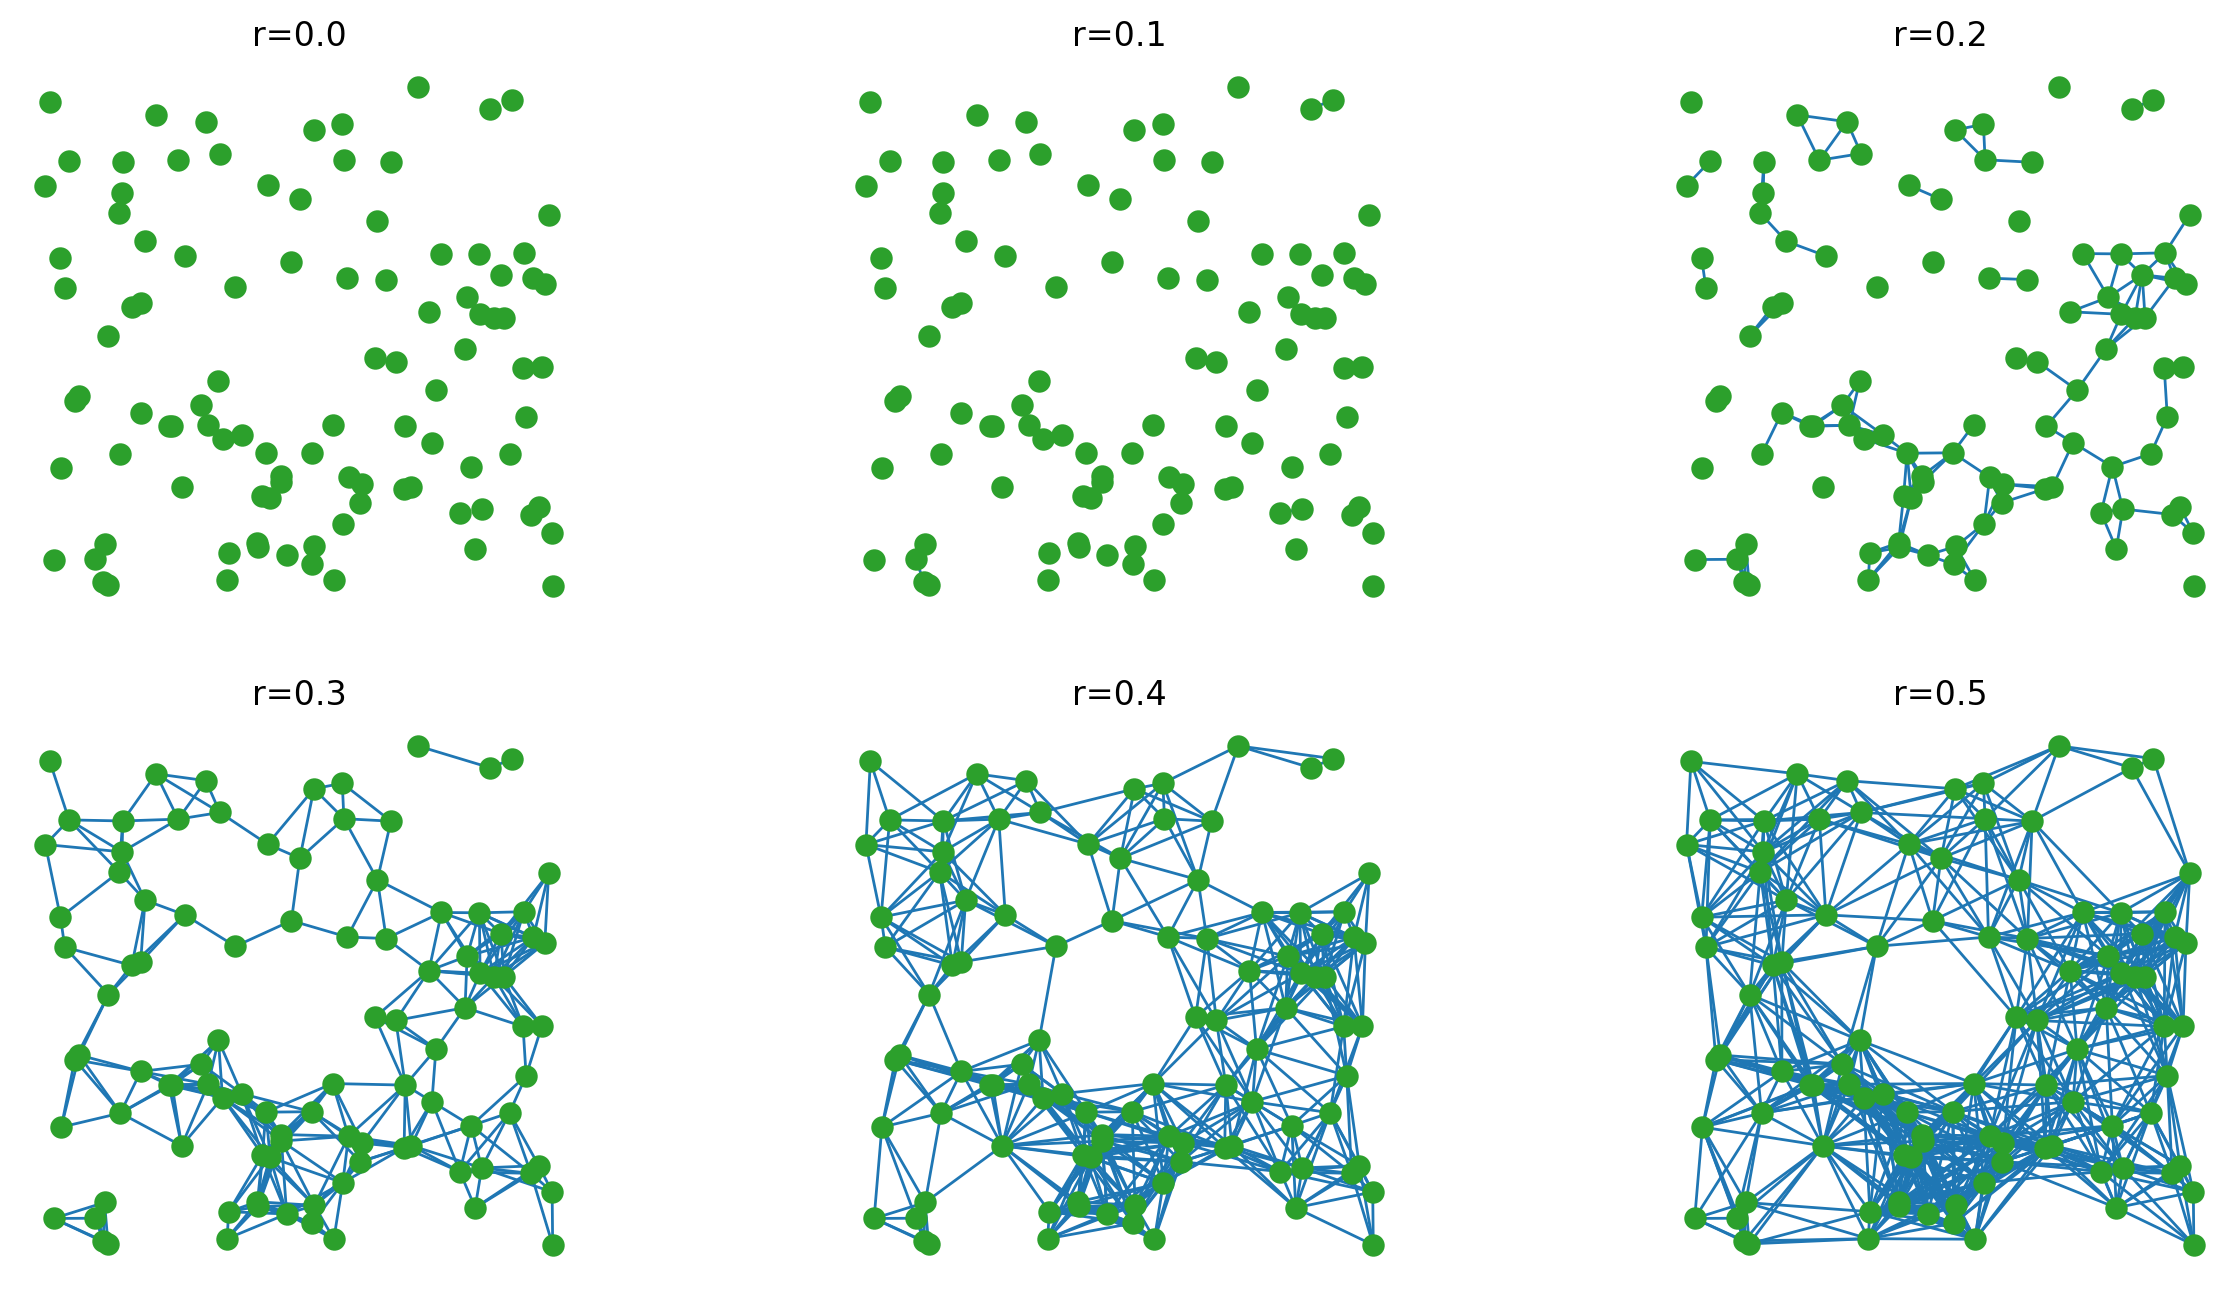

In [13]:
SET = '0'
filtration_cycle = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
fig, ax = myplt.get_axes(len(filtration_cycle), max_col=3, res=200)
for i,fil in enumerate(filtration_cycle):
    filtration = mytop.get_filtration(dataSet['data_'+SET],VRcomplexes['VR_'+SET],r=fil)
    mytop.plt_filtration(dataSet['data_'+SET], filtration, r=fil, axes=ax[i])
    ax[i].set_title(r'r='+str(fil))
    ax[i].set_aspect('equal')

In [ ]:
SET = '1'
filtration_cycle = [0.0, 0.1, 0.2, 0.3]
fig, ax = myplt.get_axes(len(filtration_cycle), max_col=2, res=200)
for i,fil in enumerate(filtration_cycle):
    filtration = mytop.get_filtration(dataSet['data_'+SET],VRcomplexes['VR_'+SET],r=fil)
    mytop.plt_filtration(dataSet['data_'+SET], filtration, axes=ax[i])
    ax[i].set_title(r'r='+str(fil))

In [ ]:
SET = '4'
filtration_cycle = [0.0, 0.2, 0.4, 0.6, 0.8]
fig, ax = myplt.get_axes(len(filtration_cycle), max_col=3, res=200)
for i,fil in enumerate(filtration_cycle):
    filtration = mytop.get_filtration(dataSet['data_'+SET],VRcomplexes['VR_'+SET],r=fil)
    mytop.plt_filtration(dataSet['data_'+SET], filtration, axes=ax[i])
    ax[i].set_title(r'r='+str(fil))

In [ ]:
# LS = gd.representations.Landscape(resolution=1000)
# L = LS.fit_transform([acX.persistence_intervals_in_dimension(1)])

LS = gd.representations.Landscape(resolution=1000)
L = LS.fit_transform([VRcomplexes['VR_0'].persistence_intervals_in_dimension(1)])

In [ ]:
L.shape

In [ ]:
plt.plot(L[0][:1000], c='tab:blue')
plt.plot(L[0][1000:2000], c='tab:cyan')
plt.plot(L[0][2000:3000], c='tab:green')
# plt.plot(L[0][3000:4000], c='tab:orange')
# plt.plot(L[0][4000:5000], c='tab:red')
plt.title("Landscape")
plt.show()

In [ ]:
SH = gd.representations.Silhouette(resolution=500, weight=lambda x: np.power(x[1]-x[0],1))
sh = SH.fit_transform([VRcomplexes['VR_0'].persistence_intervals_in_dimension(1)])

In [ ]:
plt.plot(sh[0])
plt.title("Silhouette")

In [ ]:
PI = gd.representations.PersistenceImage(bandwidth=2e-2, \
                                         im_range=[0,0.60,0,0.60], resolution=[100,100])
pi = PI.fit_transform([VRcomplexes['VR_0'].persistence_intervals_in_dimension(1)])

In [ ]:
plt.imshow(np.flip(np.reshape(pi[0], [100,100]), 0))
plt.title("Persistence Image")